In [1]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from IPython.display import Image, display

c:\Users\Tharuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
groq_api_key = 'gsk_WXEmTH6XIdj1X'
llm = ChatGroq(groq_api_key=groq_api_key, model_name="llama-3.3-70b-versatile")

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    sentiment: str

# 1. Preprocessing Node
def preprocess(state: State) -> State:
    cleaned = state["messages"][-1].content.strip()
    state["messages"][-1].content = cleaned
    return state

# 2. Sentiment Analysis Node
def analyze_sentiment(state: State) -> State:
    msg = state["messages"][-1].content
    state["sentiment"] = "positive" if "good" in msg else "neutral"
    return state

# 3. Chatbot Node
def chatbot(state: State) -> State:
    return {"messages": llm.invoke(state['messages'])}

# 4. Logging Node
def logger(state: State) -> State:
    print(f"LOG: {state['messages'][-1].content}, Sentiment: {state.get('sentiment')}")
    return state

In [5]:
# Build the graph
builder = StateGraph(State)
builder.add_node("preprocess", preprocess)
builder.add_node("analyze_sentiment", analyze_sentiment)  # renamed
builder.add_node("chatbot", chatbot)
builder.add_node("logger", logger)

In [6]:
# Define flow
builder.add_edge(START, "preprocess")
builder.add_edge("preprocess", "analyze_sentiment")  # renamed
builder.add_edge("analyze_sentiment", "chatbot")     # renamed
builder.add_edge("chatbot", "logger")
builder.add_edge("logger", END)

In [7]:
graph = builder.compile()

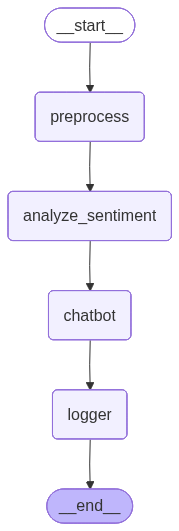

In [8]:
# Draw the graph
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [12]:
# Invoke the graph
input_message = "could you suggest me a best friendly dog breed that is good with kids?"
final_state = graph.invoke({"messages": ("user", input_message)})

# Print the final state
print("Final State:", final_state)
print("Chatbot's response:", final_state['messages'][-1].content)
print("Detected Sentiment:", final_state['sentiment'])

input_message_2 = "This is a neutral message."
final_state_2 = graph.invoke({"messages": ("user", input_message_2)})
print("Final State 2:", final_state_2)
print("Chatbot's response 2:", final_state_2['messages'][-1].content)
print("Detected Sentiment 2:", final_state_2['sentiment'])

LOG: There are many dog breeds that are great with kids and make wonderful family pets. Here are some of the most popular and friendly dog breeds that are suitable for families with children:

1. **Labrador Retriever**: Known for their gentle, patient, and playful nature, Labs are one of the most popular family dog breeds. They are great with kids and are often used as therapy dogs.
2. **Golden Retriever**: Similar to Labradors, Golden Retrievers are friendly, loyal, and patient. They are easy to train and are great with children.
3. **Beagle**: Beagles are small, energetic, and loving dogs that are great with kids. They are relatively low-maintenance and are great for families who live in smaller spaces.
4. **Boxer**: Boxers are playful, energetic, and loyal dogs that are perfect for families with kids. They are patient and gentle, making them a great breed for families with young children.
5. **Boston Terrier**: Boston Terriers are known for their friendly, outgoing, and affectionate